<a href="https://colab.research.google.com/github/SNOOthiking/jeju/blob/main/%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## 제주도 공공홈페이지에서 얻어온 음식점 리스트를 이용해 데이터프레임을 만들었다.
**기준**
1. 현재 영업중일 것 - 제주도에서 올린 자료는 21년도 7월기준으로 현재 작성시점인 22년 8월에 비교하면 약 1년 전 데이터이다. 20년도부터 코로나의 여파로 폐업하는 가게들이 많아졌는데 특히 관광지인 제주도는 여행객이 줄어들어 폐업하는 가게가 더 많을 것으로 생각된다. 

2. 맛집? 평가는 빅데이터로 
> - 여행지 음식점(식당,카페)의 경우 살고있는 주변음식점보다 리뷰와 별점이 더 많이 달린다. 리뷰를 작성하면서 추억을 글로 남기나 보다. 
> - **리뷰가 많을수록, 별점이 높을수록 좋은 식당?** 
>> 이 부분에 대해서는 한 번 의심해 볼 필요가 있다. 주변 음식점은 리뷰이벤트 등을 통해 마케팅을 하는 반면 여행지는 어떠할까? -> 제주도 여행가서 직접 확인해 봐야겠다.
> - 네이버 리뷰 50개 이상/ 별점 3.7점이상/ 다음 리뷰 30개이상/ 별점 3.5점이상
3. 카카오 맵 / 네이버 맵 
> 이번에 작업하면서 두가지 맵을 이용했다. 상대적으로 메인 플랫폼인 네이버가 리뷰수, 별점 등 압도적으로 우위를 점치고 있다. 그렇기 때문에 네이버의 신뢰성이 떨어질 수 있다. 

>> - 크롤링 작업하면서 오류가 많았다. 카카오맵은 수월하게 작동하는 반면 네이버는 300회 이상 넘어가면 제대로 크롤링이 되지 않는 치명적인 오류가 발생했다.
나는 잠을 줄여가며 수동으로 크롤링을 돌렸다. (커피를 몇 잔 마셨을까)


그렇게 만들어진 데이터를 가지고 **지금부터 분석을 해보려고 한다**

In [2]:
import pandas as pd 

In [3]:
jeju = pd.read_csv('/content/drive/MyDrive/jeju/git_jeju/jeju_final.csv')

In [18]:
def change_category(foodname,to_category):
  temp = [] 
  for i in range(len(jeju)):
    if foodname in jeju.loc[i]['사업장명']: 
      temp.append(i)
  a =jeju['업종구분소분류'].copy()
  a[temp] = to_category
  jeju['업종구분소분류'] = a 
  return jeju

In [19]:
change_category('오쿠다','한식')

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
0,카페송키,카페,제주특별자치도 제주시 삼도이동 1120-2,"제주특별자치도 제주시 무근성안길 16, 1층 (삼도이동)",45,4.3,93,4.58,제주시,제주,33.515141,126.520192
1,스톤아일랜드탭하우스,호프,제주특별자치도 제주시 연동 280-37,"제주특별자치도 제주시 삼무로7길 16, 1층 (연동)",44,4.5,147,4.47,제주시,제주,33.492461,126.493268
2,와르다레스토랑,양식,제주특별자치도 제주시 삼도이동 148-3,"제주특별자치도 제주시 관덕로8길 24-1, 1층 (삼도이동)",42,4.7,135,4.69,제주시,제주,33.511042,126.523110
3,제주마당,해산물,제주특별자치도 제주시 이호일동 663-1,"제주특별자치도 제주시 도리로 50, 2층 (이호일동)",161,3.9,1224,4.35,제주시,제주,33.498230,126.458121
4,공산명월,카페,제주특별자치도 제주시 애월읍 광령리 2611-1,"제주특별자치도 제주시 애월읍 광령평화3길 18, 1층",58,4.6,183,4.60,제주시,애월,33.447199,126.433182
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,사하커피,카페,제주특별자치도 서귀포시 성산읍 고성리 1547-1,제주특별자치도 서귀포시 성산읍 산성효자로 75,0,0.0,86,4.56,서귀포시,성산,33.448227,126.906012
3189,오또도넛서귀,카페,제주특별자치도 서귀포시 서귀동 570-5,"제주특별자치도 서귀포시 부두로 16, 1층 (서귀동)",24,4.9,381,4.76,서귀포시,서귀포,33.243852,126.565118
3190,송정동핫도그서귀포,패스트푸드,제주특별자치도 서귀포시 서귀동 406-13,"제주특별자치도 서귀포시 이중섭로 5-1, 1층 (서귀동)",23,5.0,100,4.83,서귀포시,서귀포,33.247725,126.564367
3191,벨진밧,카페,제주특별자치도 서귀포시 대정읍 안성리 2014-3,제주특별자치도 서귀포시 대정읍 보성구억로 220-1,204,2.6,819,4.44,서귀포시,대정,33.270391,126.278985


In [12]:
jeju = jeju.drop(jeju[jeju.사업장명.apply(lambda x : 'GS25' in x)].index)

In [4]:
jeju.head()

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
0,카페송키,카페,제주특별자치도 제주시 삼도이동 1120-2,"제주특별자치도 제주시 무근성안길 16, 1층 (삼도이동)",45,4.3,93,4.58,제주시,제주,33.515141,126.520192
1,스톤아일랜드탭하우스,호프,제주특별자치도 제주시 연동 280-37,"제주특별자치도 제주시 삼무로7길 16, 1층 (연동)",44,4.5,147,4.47,제주시,제주,33.492461,126.493268
2,와르다레스토랑,양식,제주특별자치도 제주시 삼도이동 148-3,"제주특별자치도 제주시 관덕로8길 24-1, 1층 (삼도이동)",42,4.7,135,4.69,제주시,제주,33.511042,126.523110
3,제주마당,해산물,제주특별자치도 제주시 이호일동 663-1,"제주특별자치도 제주시 도리로 50, 2층 (이호일동)",161,3.9,1224,4.35,제주시,제주,33.498230,126.458121
4,공산명월,카페,제주특별자치도 제주시 애월읍 광령리 2611-1,"제주특별자치도 제주시 애월읍 광령평화3길 18, 1층",58,4.6,183,4.60,제주시,애월,33.447199,126.433182


In [14]:
jeju.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 0 to 3192
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업장명       3193 non-null   object 
 1   업종구분소분류    3193 non-null   object 
 2   소재지전체주소    3193 non-null   object 
 3   도로명전체주소    3193 non-null   object 
 4   Reviews    3193 non-null   int64  
 5   stars      3193 non-null   float64
 6   n_reviews  3193 non-null   int64  
 7   n_stars    3193 non-null   float64
 8   소재지        3193 non-null   object 
 9   법정동        3193 non-null   object 
 10  위도         3193 non-null   float64
 11  경도         3193 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 324.3+ KB


In [6]:
jeju.업종구분소분류.unique()

array(['카페', '호프', '양식', '해산물', '고기', '한식', '분식', '중식', '일식', '경양식',
       '외국요리', '패스트푸드', '뷔페', '푸드트럭'], dtype=object)

In [7]:
jeju.법정동.unique()

array(['제주', '애월', '조천', '추자도', '구좌', '한림', '한경', '우도', '서귀포', '안덕', '성산',
       '대정', '중문', '표선', '남원'], dtype=object)

## 제주도 (음식점 / 카페) 리스트 총 3193개 
****
1. 사업장명 **영업점이름**
****
2. 업종구분소분류 = 총 14개로 구분
> - 카페 
> - 호프
> - 양식 
> - 해산물
> - 고기
> - 한식
> - 분식
> - 중식
> - 일식
> - 경양식 
> - 외국요리
> - 패스트푸드
> - 뷔페
> - 푸드트럭
****
3. 소재지전체주소 / 구주소
4. 도로명전체주소 / 신주소
****
5. Reviews   - **kakomap  리뷰수**
6. stars     - **kakomap  별점 5점만점**
7. n_reviews - **navermap 리뷰수**
8. n_stars   - **navermap 별점 5점만점**
****
9. 소재지  
> - 제주시
> - 서귀포시 
****
10. 법정동  = 총 15개로 구분
> - 제주
> - 애월
> - 조천
> - 추자도
> - 구좌
> - 한림
> - 한경
> - 우도
> - 서귀포
> - 안덕
> - 성산
> - 대정
> - 중문
> - 표선 
> - 남원

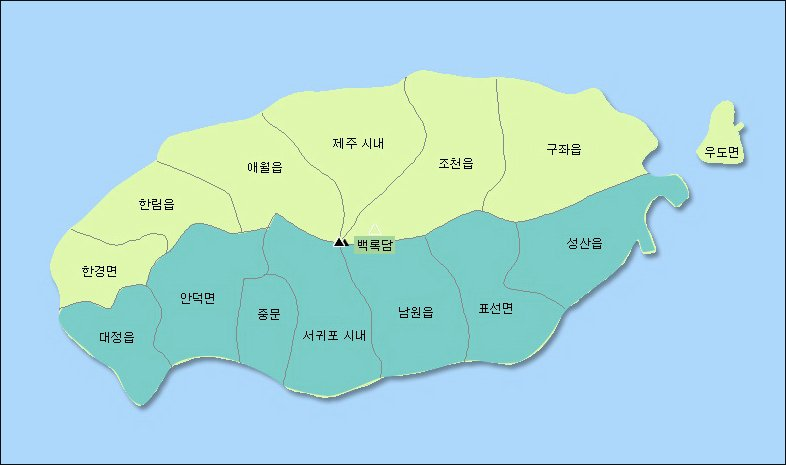

****
11. 위도 - 좌표계설정
12. 경도 - 좌표계설정 

In [8]:
jeju.groupby('법정동')['사업장명'].count()

법정동
구좌      217
남원       62
대정       95
서귀포     308
성산      168
안덕      144
애월      201
우도       43
제주     1319
조천      179
중문      147
추자도       4
표선       73
한경       65
한림      167
Name: 사업장명, dtype: int64

## 제주시의 인구가 서귀포시의 인구에 약 2.7배정도이다.

- 그렇다면 리뷰와 별점으로 분류된 데이터에서도 제주시 음식점 수와 서귀포시 음식점 수가 비슷하게 차이가 날까??

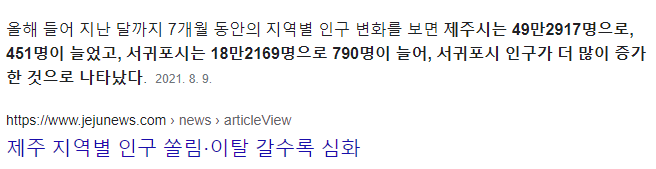

In [9]:
jeju.groupby('소재지')['사업장명'].count() # 약 2.2배 차이나는 것을 볼 수 있다.

소재지
서귀포시    1002
제주시     2190
Name: 사업장명, dtype: int64

## 제주시와 서귀포시의 인구차이만큼 
음식점의 수도 차이가 나는것을 볼 수 있었다. 제주시가 서귀포시보다 더 발달되어 있고 인구도 많기 때문에 당연히 많이 있을수 밖에 없다 라고 생각된다. 
하지만 제주시와 추자도/우도를 제외하면 크게 차이가 나지 않다로 보이는데 지역마다 괜찮은 맛집들이 즐비해 있는것을 볼 수 있다. 

**그렇다면 특정 지역을 선택하면 랜덤으로 음식점이나 카페를 추천하는 알고리즘을 만들 수 있지 않을까?** - 도전과제 1

In [10]:
import random

loc = input(f'지역을 입력해주세요 : {jeju.법정동.unique()} => ')
choose = jeju[jeju.법정동 == loc]
random_c = random.randrange(1,len(choose))
print(choose.iloc[random_c])

지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 제주
사업장명                                              역전할머니맥주노형
업종구분소분류                                                  호프
소재지전체주소                              제주특별자치도 제주시 노형동 722-3 
도로명전체주소      제주특별자치도 제주시 연북로 45, 122,123,124호 (노형동, 메르헨하우스)
Reviews                                                   3
stars                                                   2.4
n_reviews                                               151
n_stars                                                4.33
소재지                                                     제주시
법정동                                                      제주
위도                                                33.482316
경도                                               126.486273
Name: 2428, dtype: object


In [11]:
jeju[jeju.columns[:4]]=jeju[jeju.columns[:4]].astype(str)

In [33]:
a=1
while(a!=2):
  loc = input(f'지역을 입력해주세요 : {jeju.법정동.unique()} => ')
  while loc not in jeju.법정동.unique():
    loc = input(f'지역을 다시 입력해주세요 : {jeju.법정동.unique()} => ')
  select_loc = jeju[jeju.법정동==loc]
  print('----------------------------------------')
  print(f'선택하신 지역의 카테고리와 음식점 수 입니다.')
  print('----------------------------------------')
  print(select_loc.groupby('업종구분소분류')['사업장명'].count())
  print('----------------------------------------')
  food = input(f'카테고리를 선택해주세요 : {jeju.업종구분소분류.unique()} => ')
  while food not in jeju[jeju.법정동==loc]['업종구분소분류'].unique():
    food = input(f'해당 지역에는 선택한 카테고리가 없습니다. 다시입력해주세요 : {jeju.업종구분소분류.unique()} => ')
  choose = jeju[(jeju.법정동 == loc )&(jeju.업종구분소분류==food)]
  random_c = random.randrange(0,len(choose))
  print(choose.iloc[random_c]) 
  a = 2


지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 조천
----------------------------------------
선택하신 지역의 카테고리와 음식점 수 입니다.
----------------------------------------
업종구분소분류
경양식       4
고기       17
분식        3
양식        4
외국요리      3
일식        4
중식        3
카페       39
패스트푸드     1
한식       87
해산물       9
호프        6
Name: 사업장명, dtype: int64
----------------------------------------
카테고리를 선택해주세요 : ['카페' '호프' '양식' '해산물' '고기' '한식' '분식' '중식' '일식' '경양식' '외국요리' '패스트푸드' '뷔페'
 '푸드트럭'] => 카페
사업장명                                 안녕토르
업종구분소분류                                카페
소재지전체주소       제주특별자치도 제주시 조천읍 선흘리 1947-2 
도로명전체주소      제주특별자치도 제주시 조천읍 선진길 7-19, 1층
Reviews                                52
stars                                 4.7
n_reviews                              87
n_stars                              4.63
소재지                                   제주시
법정동                                    조천
위도                              33.459809
경도        

In [31]:
# 네이버는 크롤링이 온전치 않기 때문에 나오면 바로바로 검색 후 수정
b = jeju['n_reviews'].copy()
c = jeju['n_stars'].copy()
b[1164] = 826
c[1164] = 4.58

jeju['n_reviews'] = b
jeju['n_stars'] = c

In [149]:
# 랜덤 점심/카페/저녁 추천  
def lucadi(): # Lunch cafe dinner 루카디 
  loc_list = [] 
  while (len(loc_list)<3):
    loc1 = input(f'점심먹을 지역을 입력해주세요 : {jeju.법정동.unique()} => ')
    while loc1 not in jeju.법정동.unique():
      loc1 = input(f'점심 지역을 다시 지정해주세요 : {jeju.법정동.unique()} => ')
    loc_list.append(loc1)
    loc2 = input(f'어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : {jeju.법정동.unique()} => ')
    if (loc2 == 'X')|(loc2=='x'):
      loc_list.append('X')
    else:
      while (loc2 not in jeju.법정동.unique()) & (loc2 != 'X') & (loc2 != 'x' ):
        loc2 = input(f'어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : {jeju.법정동.unique()} => ')
      if (loc2 == 'X')|(loc2=='x'):
        loc_list.append('X')
      else:
        loc_list.append(loc2)
    loc3 = input(f'저녁먹을 지역을 입력해주세요 : {jeju.법정동.unique()} => ')
    while loc3 not in jeju.법정동.unique():
      loc3 = input(f'저녁식사 지역을 다시 입력해주세요 : {jeju.법정동.unique()} => ')
    loc_list.append(loc3)
  for loc in range(len(loc_list)):
    if loc != 1: 
      choose_loc = jeju[(jeju.법정동==loc_list[loc])&(jeju.업종구분소분류!='카페')]
    else:
      if loc_list[loc] == 'X':
        print('카페는 패스')
      else:
         choose_loc = jeju[(jeju.법정동==loc_list[loc])&(jeju.업종구분소분류=='카페')]
    random_food = random.randrange(0,len(choose_loc))
    print(choose_loc.iloc[random_food])

In [134]:
lucadi()

점심먹을 지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => wpwn
지역을 다시 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 제주
어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 애월
저녁먹을 지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 조천
사업장명                                        라쁠라주
업종구분소분류                                       분식
소재지전체주소                   제주특별자치도 제주시 용담삼동 2289 
도로명전체주소      제주특별자치도 제주시 서해안로 518, 1층 제1호 (용담삼동)
Reviews                                       11
stars                                        2.5
n_reviews                                    223
n_stars                                     4.26
소재지                                          제주시
법정동                                           제주
위도                                     33.519853
경도                          

In [189]:
jeju.to_csv('/content/drive/MyDrive/jeju/git_jeju/jeju_final.csv',index=False)

In [ ]:
jeju[jeju.업종구분소분류=='패스트푸드'] # 패스트 푸드 삭제시킬까 .. 

## 추천 시스템을 가볍게 만들어 보았다.

# 제주도에서 가장 리뷰가 많은 곳은 어디일까???

In [158]:
# 네이버 맵 기준 
print('네이버맵\n',jeju.loc[jeju.n_reviews.argmax()])
# 카카오 맵 기준 
print('카카오맵\n',jeju.loc[jeju.Reviews.argmax()])

네이버맵
 사업장명                                 우진해장국
업종구분소분류                                 한식
소재지전체주소              제주특별자치도 제주시 삼도이동 831 
도로명전체주소      제주특별자치도 제주시 서사로 11, 1층 (삼도이동)
Reviews                               2118
stars                                  3.7
n_reviews                            13202
n_stars                               4.41
소재지                                    제주시
법정동                                     제주
위도                               33.511522
경도                              126.520039
Name: 291, dtype: object
카카오맵
 사업장명                                 우진해장국
업종구분소분류                                 한식
소재지전체주소              제주특별자치도 제주시 삼도이동 831 
도로명전체주소      제주특별자치도 제주시 서사로 11, 1층 (삼도이동)
Reviews                               2118
stars                                  3.7
n_reviews                            13202
n_stars                               4.41
소재지                                    제주시
법정동                                     제주
위도               

## 이럴수가.. 우진해장국이 카카오,네이버 모두 이관왕을 차지했다. 

10개씩 확인해 보자 

In [163]:
jeju.loc[jeju.n_reviews.sort_values(ascending=False)[:10].index]

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
2360,조천항아리식당,한식,제주특별자치도 제주시 조천읍 조천리 2532,제주특별자치도 제주시 조천읍 신북로 225,150,4.7,8437,4.79,제주시,조천,33.536164,126.636897
1684,이니스프리제주하우스,카페,제주특별자치도 서귀포시 안덕면 서광리 1235-1,"제주특별자치도 서귀포시 안덕면 신화역사로 15, 1층",327,4.3,7998,4.55,서귀포시,안덕,33.306100,126.290529
1602,스타벅스제주함덕,카페,제주특별자치도 제주시 조천읍 함덕리 1004-27,"제주특별자치도 제주시 조천읍 조함해안로 522, 1~2층",261,3.9,7428,4.45,제주시,조천,33.542496,126.668699
2891,엔제리너스제주공항국내선탑승,카페,제주특별자치도 제주시 용담이동 2002 외3필지 여객청사(2층),"제주특별자치도 제주시 공항로 2 (용담이동, 여객청사)",0,0.0,7198,4.27,제주시,제주,33.505936,126.495951
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020
450,문개항아리애월,한식,제주특별자치도 제주시 애월읍 하귀2리 2701-1,제주특별자치도 제주시 애월읍 가문동길 38,75,4.5,6343,4.82,제주시,애월,33.485782,126.392407


In [164]:
jeju.loc[jeju.Reviews.sort_values(ascending=False)[:10].index]

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
116,고집돌우럭제주공항,한식,제주특별자치도 제주시 건입동 1319-124,제주특별자치도 제주시 임항로 30 (건입동),1245,4.8,5428,4.71,제주시,제주,33.516308,126.528064
1030,형제도식당,한식,"제주특별자치도 서귀포시 색달동 2273-1 , 1층","제주특별자치도 서귀포시 일주서로 915, 1층 (색달동)",1229,4.5,1434,4.66,서귀포시,중문,33.257788,126.412734
520,해성도뚜리,한식,제주특별자치도 제주시 애월읍 구엄리 1258,제주특별자치도 제주시 애월읍 애월해안로 682,1150,3.6,1218,4.45,제주시,애월,33.481805,126.375038
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637
853,은혜전복,한식,제주특별자치도 제주시 애월읍 애월리 2528,"제주특별자치도 제주시 애월읍 애월로1길 24-3, 1층",1011,3.8,2256,4.49,제주시,애월,33.462966,126.310173
1367,카페바나나중문,카페,제주특별자치도 서귀포시 색달동 2353,제주특별자치도 서귀포시 일주서로 875 (색달동),982,4.8,2322,4.75,서귀포시,중문,33.258022,126.417179
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020


In [188]:
## 카카오, 네이버 맵 모두 리뷰가 가장 많은곳 
k_10 = set(jeju.Reviews.sort_values(ascending=False)[:10].index) 
n_10 = set(jeju.n_reviews.sort_values(ascending=False)[:10].index)
jeju.loc[list(n_10 -(n_10-k_10))]

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637
